In [74]:
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import seaborn as sns
import patsy
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.cross_validation import cross_val_predict

In [75]:
df=pd.read_csv('/Users/Marina/Documents/GA Data Science/projects/projects-capstone/clean_data.csv')

In [76]:
df_male=df.loc[df['gender'] == "Male"]

In [77]:
# C(dec)[T.1]	0.200214	0.02	0.167070	0.221267
# attr_o	0.072026	0.06	0.063325	0.080464
# like_o	0.058390	0.08	0.065774	0.189603
# pf_o_int	0.050327	0.10	0.021251	0.035438
# round	0.041314	0.02	0.018449	0.024118
# pf_o_att	0.035652	0.06	0.017979	0.027205
# prob_o	0.032315	0.04	0.042153	0.017558
# shar_o	0.031599	0.06	0.052779	0.022253
# fun_o	0.028191	0.04	0.032915	0.021888
# fun1_1	0.028021	0.02	0.017428	0.017361
# sinc_o	0.026788	0.02	0.019658	0.010509
# amb_o	0.025405	0.02	0.016344	0.013256
# shar1_1	0.023754	0.00	0.021813	0.006221
# age_o	0.022258	0.06	0.025336	0.022285
# pf_o_fun	0.021507	0.02	0.022025	0.014313
# pf_o_amb	0.020382	0.04	0.021415	0.020443
# pf_o_sin	0.019778	0.04	0.023218	0.013944
# pf_o_sha	0.016985	0.00	0.016816	0.017718
# date	0.015548	0.00	0.014920	0.000000
# met_o	0.013490	0.02	0.010824	0.002120
# fun2_1	0.013481	0.02	0.017681	0.017634


In [78]:
col_male=['attr_o','like_o','pf_o_int','round','pf_o_att','prob_o','shar_o','fun_o','fun1_1','sinc_o','amb_o',\
          'shar1_1','age_o','pf_o_fun','pf_o_amb','pf_o_sin','pf_o_sha','date','met_o','fun2_1']


data_male=df_male[col_male]
len(data_male)

# EXCLUDED attr1_1,imprace,intel2_1

2732

In [79]:
# col_male=['attr_o', 'like_o','fun_o','prob_o','shar_o','attr1_1','pf_o_int','amb_o','date','pf_o_att','fun1_1','movies',\
#          'met_o','sinc_o','round','age_o']

# data_male=df_male[col_male]
# len(data_male)

In [80]:
from sklearn.preprocessing import StandardScaler
x=data_male

X_norm =  StandardScaler().fit_transform(x);

df_stand=pd.DataFrame(X_norm, columns=data_male.columns)
df_stand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2732 entries, 0 to 2731
Data columns (total 20 columns):
attr_o      2732 non-null float64
like_o      2732 non-null float64
pf_o_int    2732 non-null float64
round       2732 non-null float64
pf_o_att    2732 non-null float64
prob_o      2732 non-null float64
shar_o      2732 non-null float64
fun_o       2732 non-null float64
fun1_1      2732 non-null float64
sinc_o      2732 non-null float64
amb_o       2732 non-null float64
shar1_1     2732 non-null float64
age_o       2732 non-null float64
pf_o_fun    2732 non-null float64
pf_o_amb    2732 non-null float64
pf_o_sin    2732 non-null float64
pf_o_sha    2732 non-null float64
date        2732 non-null float64
met_o       2732 non-null float64
fun2_1      2732 non-null float64
dtypes: float64(20)
memory usage: 426.9 KB


In [81]:
categ_male= ['dec']
df_male_cat=df_male[categ_male]

len(df_male_cat)


2732

In [82]:
X = patsy.dmatrix('~ C(dec)', df_male_cat)

df_cat=pd.DataFrame(X, columns=X.design_info.column_names)
df_cat.head()

,Intercept,C(dec)[T.1]
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [83]:
df_male_final = pd.concat([df_cat, df_stand], axis=1)
len(df_male_final)

2732

In [84]:
y_male = df_male.match

#y_male = y_male.map(lambda x: 'no' if x ==0 else 'yes')

y_male = y_male.values

y_male

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
X_male=df_male_final

In [86]:
X_male.shape

(2732, 22)

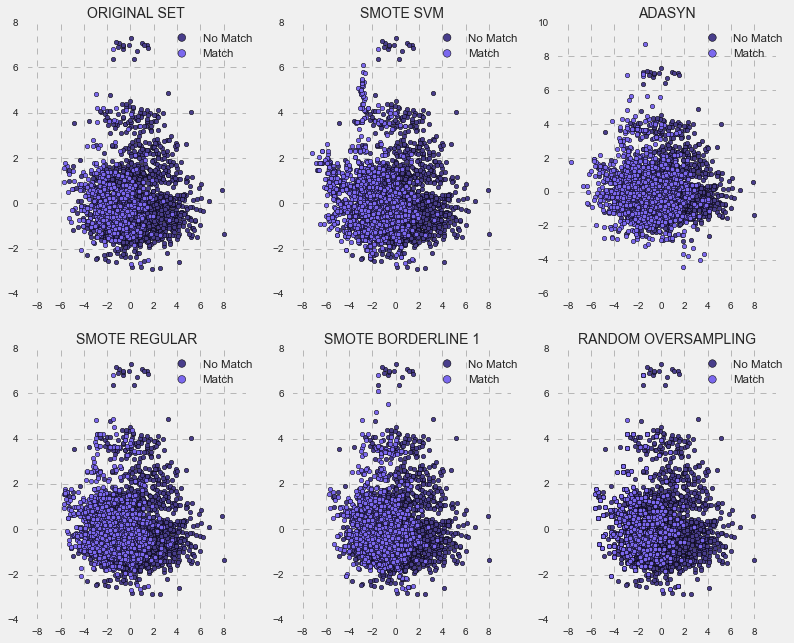

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE, ADASYN,RandomOverSampler
#plt.style.use(['fivethirtyeight','bmh'])

plt.style.use(['fivethirtyeight'])
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_male)


fig, ax = plt.subplots(2,3, figsize=(12,10))

ax[0][0].scatter(X_vis[y_male == 0, 0], X_vis[y_male == 0, 1], label="No Match", 
            edgecolor='black', linewidth=0.50,color='darkslateblue',s=20)
ax[0][0].scatter(X_vis[y_male == 1, 0], X_vis[y_male == 1, 1], label="Match",
            edgecolor='black', linewidth=0.50,color='mediumslateblue',s=20)
ax[0][0].set_title('ORIGINAL SET',fontsize = 14)
ax[0][0].grid(color='gray', linestyle='--', alpha=.5)
ax[0][0].legend(loc='best', fontsize = 11.5,markerscale=1.7, bbox_to_anchor=(1.07,1))
ax[0][0].set_xticks(range(-8,9, 2))
ax[0][0].set_xlim([-9, 10])
# for tick in ax[0][0].get_xticklabels():
#     tick.set_rotation(45)



sm = SMOTE(kind='svm')
X_resampled1, y_resampled1 = sm.fit_sample(X_male, y_male)
X_res_vis1 = pca.transform(X_resampled1)

ax[0][1].scatter(X_res_vis1[y_resampled1 == 0, 0], X_res_vis1[y_resampled1 == 0, 1],
            label="No Match", edgecolor='black', linewidth=0.50,color='darkslateblue',s=20)
ax[0][1].scatter(X_res_vis1[y_resampled1 == 1, 0], X_res_vis1[y_resampled1 == 1, 1],
            label="Match", edgecolor='black', linewidth=0.50,color='mediumslateblue',s=20)
ax[0][1].set_title('SMOTE SVM',fontsize = 14)
ax[0][1].grid(color='gray', linestyle='--', alpha=.5)
ax[0][1].legend(loc='best', fontsize = 11.5,markerscale=1.7, bbox_to_anchor=(1.07,1))
ax[0][1].set_xticks(range(-8,9, 2))
ax[0][1].set_xlim([-9, 10])

ada = ADASYN()
X_resampled2, y_resampled2 = ada.fit_sample(X_male, y_male)
X_res_vis2 = pca.transform(X_resampled2)

ax[0][2].scatter(X_res_vis2[y_resampled2 == 0, 0], X_res_vis2[y_resampled2 == 0, 1],
            label="No Match", edgecolor='black', linewidth=0.50,color='darkslateblue',s=20)
ax[0][2].scatter(X_res_vis2[y_resampled2 == 1, 0], X_res_vis2[y_resampled2 == 1, 1],
            label="Match", edgecolor='black', linewidth=0.50,color='mediumslateblue',s=20)
ax[0][2].set_title('ADASYN',fontsize = 14)
ax[0][2].grid(color='gray', linestyle='--', alpha=.5)
ax[0][2].legend(loc='best', fontsize = 11.5,markerscale=1.7, bbox_to_anchor=(1.07,1))
ax[0][2].set_xticks(range(-8,9, 2))
ax[0][2].set_xlim([-9, 10])

sm = SMOTE(kind='regular')
X_resampled3, y_resampled3 = sm.fit_sample(X_male, y_male)
X_res_vis3 = pca.transform(X_resampled3)

ax[1][0].scatter(X_res_vis3[y_resampled3 == 0, 0], X_res_vis3[y_resampled3 == 0, 1],
            label="No Match",  edgecolor='black', linewidth=0.50,color='darkslateblue',s=20)
ax[1][0].scatter(X_res_vis3[y_resampled3 == 1, 0], X_res_vis3[y_resampled3 == 1, 1],
            label="Match", edgecolor='black', linewidth=0.50,color='mediumslateblue',s=20)
ax[1][0].set_title('SMOTE REGULAR', fontsize = 14)
ax[1][0].grid(color='gray', linestyle='--', alpha=.5)
ax[1][0].legend(loc='best', fontsize = 11.5,markerscale=1.7, bbox_to_anchor=(1.07,1))
ax[1][0].set_xticks(range(-8,9, 2))
ax[1][0].set_xlim([-9, 10])

sm = SMOTE(kind='borderline1')
X_resampled4, y_resampled4 = sm.fit_sample(X_male, y_male)
X_res_vis4 = pca.transform(X_resampled4)

ax[1][1].scatter(X_res_vis4[y_resampled4 == 0, 0], X_res_vis4[y_resampled4 == 0, 1],
            label="No Match",  edgecolor='black', linewidth=0.50,color='darkslateblue',s=20)
ax[1][1].scatter(X_res_vis4[y_resampled4 == 1, 0], X_res_vis4[y_resampled4 == 1, 1],
            label="Match", edgecolor='black', linewidth=0.50,color='mediumslateblue',s=20)
ax[1][1].set_title('SMOTE BORDERLINE 1', fontsize = 14)
ax[1][1].grid(color='gray', linestyle='--', alpha=.5)
ax[1][1].legend(loc='best', fontsize = 11.5,markerscale=1.7, bbox_to_anchor=(1.07,1))
ax[1][1].set_xticks(range(-8,9, 2))
ax[1][1].set_xlim([-9, 10])

ros = RandomOverSampler()
X_resampled5, y_resampled5 = ros.fit_sample(X_male, y_male)
X_res_vis5 = pca.transform(X_resampled5)

ax[1][2].scatter(X_res_vis5[y_resampled5 == 0, 0], X_res_vis5[y_resampled5 == 0, 1],
            label="No Match",  edgecolor='black', linewidth=0.50,color='darkslateblue',s=20)
ax[1][2].scatter(X_res_vis5[y_resampled5 == 1, 0], X_res_vis5[y_resampled5 == 1, 1],
            label="Match", edgecolor='black', linewidth=0.50,color='mediumslateblue',s=20)
ax[1][2].set_title('RANDOM OVERSAMPLING',  fontsize = 14)
ax[1][2].grid(color='gray', linestyle='--', alpha=.5)
ax[1][2].legend(loc='best', fontsize = 11.5,markerscale=1.7, bbox_to_anchor=(1.07,1))
ax[1][2].set_xticks(range(-8,9, 2))
ax[1][2].set_xlim([-9, 10])
plt.show()


### Modeling with Original Set

In [137]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_male, y_male,
                                                    train_size=0.7,
                                                    random_state=10,
                                                    stratify=y_male)

cv_train = StratifiedKFold(y_train, n_folds=10, shuffle=True, random_state=10)
cv_test = StratifiedKFold(y_test, n_folds=10, shuffle=True, random_state=10)

lg= LogisticRegression(random_state=10)
dt = DecisionTreeClassifier(class_weight='balanced',min_samples_split=50,random_state=10)
bdt = BaggingClassifier(DecisionTreeClassifier(random_state=10),random_state=10)
rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
et = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
abc = AdaBoostClassifier(random_state=10)
gbst = GradientBoostingClassifier(random_state=10)
bnb = BernoulliNB()
svc = SVC(kernel='linear',probability=True,random_state=10)




def score(model, name):
    train_score = cross_val_score(model, X_train, y_train, cv=cv_train, n_jobs=-1)
    test_score = cross_val_score(model, X_test, y_test, cv=cv_test, n_jobs=-1)
    print "{} Training Accuracy Score:\t{:0.3} ± {:0.3}".format(name, train_score.mean().round(3),\
                                                                train_score.std().round(3))
    print "{} Test Accuracy Score:\t{:0.3} ± {:0.3}".format(name, test_score.mean().round(3),\
                                                                test_score.std().round(3))
    print " "
        
score(dt,"Decision Tree")
score(lg, "Logistic Regres")
score(bdt, "Bagging DT")
score(rf, "Random Forest")
score(et, "Extra Trees")
score(abc, "Ada Boost")
score(gbst, "Grad Boosting")
score(bnb, "Bernoulli NB")
score(svc, "SVC")


Decision Tree Training Accuracy Score:	0.832 ± 0.03
Decision Tree Test Accuracy Score:	0.835 ± 0.032
 
Logistic Regres Training Accuracy Score:	0.893 ± 0.022
Logistic Regres Test Accuracy Score:	0.898 ± 0.03
 
Bagging DT Training Accuracy Score:	0.893 ± 0.018
Bagging DT Test Accuracy Score:	0.898 ± 0.022
 
Random Forest Training Accuracy Score:	0.885 ± 0.024
Random Forest Test Accuracy Score:	0.869 ± 0.021
 
Extra Trees Training Accuracy Score:	0.881 ± 0.025
Extra Trees Test Accuracy Score:	0.883 ± 0.016
 
Ada Boost Training Accuracy Score:	0.886 ± 0.017
Ada Boost Test Accuracy Score:	0.892 ± 0.026
 
Grad Boosting Training Accuracy Score:	0.896 ± 0.02
Grad Boosting Test Accuracy Score:	0.89 ± 0.029
 
Bernoulli NB Training Accuracy Score:	0.882 ± 0.021
Bernoulli NB Test Accuracy Score:	0.901 ± 0.021
 
SVC Training Accuracy Score:	0.894 ± 0.018
SVC Test Accuracy Score:	0.903 ± 0.023
 


### Modeling with SMOT SVC

In [163]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled1, y_resampled1,
                                                    train_size=0.7,
                                                    random_state=10,
                                                    stratify=y_resampled1)

cv_train1 = StratifiedKFold(y_train1, n_folds=10, shuffle=True, random_state=10)
cv_test1 = StratifiedKFold(y_test1, n_folds=10, shuffle=True, random_state=10)

lg1= LogisticRegression(random_state=10)
dt1 = DecisionTreeClassifier(class_weight='balanced',min_samples_split=50,random_state=10)
bdt1 = BaggingClassifier(DecisionTreeClassifier(random_state=10),random_state=10)
rf1 = RandomForestClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
et1= ExtraTreesClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
abc1 = AdaBoostClassifier(random_state=10)
gbst1 = GradientBoostingClassifier(random_state=10)
bnb1 = BernoulliNB()
svc1 = SVC(kernel='linear',probability=True,random_state=10)




def score(model, name):
    train_score = cross_val_score(model, X_train1, y_train1, cv=cv_train1, n_jobs=-1)
    test_score = cross_val_score(model, X_test1, y_test1, cv=cv_test1, n_jobs=-1)
    print "{} Training Accuracy Score:\t{:0.3} ± {:0.3}".format(name, train_score.mean().round(3),\
                                                                train_score.std().round(3))
    print "{} Test Accuracy Score:\t{:0.3} ± {:0.3}".format(name, test_score.mean().round(3),\
                                                                test_score.std().round(3))
    print " "
        
score(dt1,"Decision Tree")
score(lg1, "Logistic Regres")
score(bdt1, "Bagging DT")
score(rf1, "Random Forest")
score(et1, "Extra Trees")
score(abc1, "Ada Boost")
score(gbst1, "Grad Boosting")
score(bnb1, "Bernoulli NB")
score(svc1, "SVC")

Decision Tree Training Accuracy Score:	0.905 ± 0.021
Decision Tree Test Accuracy Score:	0.886 ± 0.033
 
Logistic Regres Training Accuracy Score:	0.901 ± 0.013
Logistic Regres Test Accuracy Score:	0.893 ± 0.033
 
Bagging DT Training Accuracy Score:	0.933 ± 0.014
Bagging DT Test Accuracy Score:	0.916 ± 0.022
 
Random Forest Training Accuracy Score:	0.933 ± 0.016
Random Forest Test Accuracy Score:	0.921 ± 0.021
 
Extra Trees Training Accuracy Score:	0.942 ± 0.01
Extra Trees Test Accuracy Score:	0.916 ± 0.025
 
Ada Boost Training Accuracy Score:	0.927 ± 0.011
Ada Boost Test Accuracy Score:	0.922 ± 0.024
 
Grad Boosting Training Accuracy Score:	0.941 ± 0.014
Grad Boosting Test Accuracy Score:	0.927 ± 0.021
 
Bernoulli NB Training Accuracy Score:	0.887 ± 0.015
Bernoulli NB Test Accuracy Score:	0.889 ± 0.028
 
SVC Training Accuracy Score:	0.899 ± 0.015
SVC Test Accuracy Score:	0.892 ± 0.038
 



### Modeling with ADASYN

In [168]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_resampled2, y_resampled2,
                                                    train_size=0.7,
                                                    random_state=10,
                                                    stratify=y_resampled2)

cv_train2 = StratifiedKFold(y_train2, n_folds=10, shuffle=True, random_state=10)
cv_test2 = StratifiedKFold(y_test2, n_folds=10, shuffle=True, random_state=10)

lg2= LogisticRegression(random_state=10)
dt2 = DecisionTreeClassifier(class_weight='balanced',min_samples_split=50,random_state=10)
bdt2 = BaggingClassifier(DecisionTreeClassifier(random_state=10),random_state=10)
rf2 = RandomForestClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
et2 = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
abc2 = AdaBoostClassifier(random_state=10)
gbst2 = GradientBoostingClassifier(random_state=10)
bnb2 = BernoulliNB()
svc2 = SVC(kernel='linear',probability=True,random_state=10)




def score(model, name):
    train_score = cross_val_score(model, X_train2, y_train2, cv=cv_train2, n_jobs=-1)
    test_score = cross_val_score(model, X_test2, y_test2, cv=cv_test2, n_jobs=-1)
    print "{} Training Accuracy Score:\t{:0.3} ± {:0.3}".format(name, train_score.mean().round(3),\
                                                                train_score.std().round(3))
    print "{} Test Accuracy Score:\t{:0.3} ± {:0.3}".format(name, test_score.mean().round(3),\
                                                                test_score.std().round(3))
    print " "
        
score(dt2,"Decision Tree")
score(lg2, "Logistic Regres")
score(bdt2, "Bagging DT")
score(rf2, "Random Forest")
score(et2, "Extra Trees")
score(abc2, "Ada Boost")
score(gbst2, "Grad Boosting")
score(bnb2, "Bernoulli NB")
score(svc2, "SVC")

Decision Tree Training Accuracy Score:	0.902 ± 0.018
Decision Tree Test Accuracy Score:	0.873 ± 0.023
 
Logistic Regres Training Accuracy Score:	0.874 ± 0.016
Logistic Regres Test Accuracy Score:	0.875 ± 0.022
 
Bagging DT Training Accuracy Score:	0.934 ± 0.014
Bagging DT Test Accuracy Score:	0.908 ± 0.015
 
Random Forest Training Accuracy Score:	0.936 ± 0.006
Random Forest Test Accuracy Score:	0.916 ± 0.015
 
Extra Trees Training Accuracy Score:	0.938 ± 0.016
Extra Trees Test Accuracy Score:	0.91 ± 0.026
 
Ada Boost Training Accuracy Score:	0.919 ± 0.014
Ada Boost Test Accuracy Score:	0.923 ± 0.022
 
Grad Boosting Training Accuracy Score:	0.934 ± 0.008
Grad Boosting Test Accuracy Score:	0.921 ± 0.008
 
Bernoulli NB Training Accuracy Score:	0.845 ± 0.021
Bernoulli NB Test Accuracy Score:	0.84 ± 0.028
 
SVC Training Accuracy Score:	0.868 ± 0.016
SVC Test Accuracy Score:	0.878 ± 0.028
 


### Modeling with SMOT REGULAR

In [36]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_resampled3, y_resampled3,
                                                    train_size=0.7,
                                                    random_state=10,
                                                    stratify=y_resampled5)

cv_train3 = StratifiedKFold(y_train3, n_folds=10, shuffle=True, random_state=10)
cv_test3 = StratifiedKFold(y_test3, n_folds=10, shuffle=True, random_state=10)

lg3= LogisticRegression(random_state=10)
dt3 = DecisionTreeClassifier(class_weight='balanced',min_samples_split=50,random_state=10)
bdt3 = BaggingClassifier(DecisionTreeClassifier(random_state=10),random_state=10)
rf3 = RandomForestClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
et3 = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
abc3 = AdaBoostClassifier(random_state=10)
gbst3 = GradientBoostingClassifier(random_state=10)
bnb3 = BernoulliNB()
svc3 = SVC(kernel='linear',probability=True,random_state=10)




def score(model, name):
    train_score = cross_val_score(model, X_train3, y_train3, cv=cv_train3, n_jobs=-1)
    test_score = cross_val_score(model, X_test3, y_test3, cv=cv_test3, n_jobs=-1)
    print "{} Training Accuracy Score:\t{:0.3} ± {:0.3}".format(name, train_score.mean().round(3),\
                                                                train_score.std().round(3))
    print "{} Test Accuracy Score:\t{:0.3} ± {:0.3}".format(name, test_score.mean().round(3),\
                                                                test_score.std().round(3))
    print " "
        
score(dt3,"Decision Tree")
score(lg3, "Logistic Regres")
score(bdt3, "Bagging DT")
score(rf3, "Random Forest")
score(et3, "Extra Trees")
score(abc3, "Ada Boost")
score(gbst3, "Grad Boosting")
score(bnb3, "Bernoulli NB")
score(svc3, "SVC")

Decision Tree Training Accuracy Score:	0.897 ± 0.015
Decision Tree Test Accuracy Score:	0.896 ± 0.015
 
Logistic Regres Training Accuracy Score:	0.888 ± 0.019
Logistic Regres Test Accuracy Score:	0.891 ± 0.026
 
Bagging DT Training Accuracy Score:	0.937 ± 0.017
Bagging DT Test Accuracy Score:	0.919 ± 0.021
 
Random Forest Training Accuracy Score:	0.935 ± 0.009
Random Forest Test Accuracy Score:	0.924 ± 0.02
 
Extra Trees Training Accuracy Score:	0.944 ± 0.01
Extra Trees Test Accuracy Score:	0.93 ± 0.017
 
Ada Boost Training Accuracy Score:	0.922 ± 0.016
Ada Boost Test Accuracy Score:	0.93 ± 0.017
 
Grad Boosting Training Accuracy Score:	0.937 ± 0.014
Grad Boosting Test Accuracy Score:	0.931 ± 0.019
 
Bernoulli NB Training Accuracy Score:	0.864 ± 0.015
Bernoulli NB Test Accuracy Score:	0.872 ± 0.025
 
SVC Training Accuracy Score:	0.888 ± 0.018
SVC Test Accuracy Score:	0.89 ± 0.026
 


### Modeling with SMOT BORDELINE 1

In [37]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

X_train4, X_test4, y_train4, y_test4 = train_test_split(X_resampled4, y_resampled4,
                                                    train_size=0.7,
                                                    random_state=10,
                                                    stratify=y_resampled4)

cv_train4 = StratifiedKFold(y_train4, n_folds=10, shuffle=True, random_state=10)
cv_test4 = StratifiedKFold(y_test4, n_folds=10, shuffle=True, random_state=10)

lg4= LogisticRegression(random_state=10)
dt4 = DecisionTreeClassifier(class_weight='balanced',min_samples_split=50,random_state=10)
bdt4 = BaggingClassifier(DecisionTreeClassifier(random_state=10),random_state=10)
rf4 = RandomForestClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
et4 = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
abc4 = AdaBoostClassifier(random_state=10)
gbst4 = GradientBoostingClassifier(random_state=10)
bnb4 = BernoulliNB()
svc4 = SVC(kernel='linear',probability=True,random_state=10)




def score(model, name):
    train_score = cross_val_score(model, X_train4, y_train4, cv=cv_train4, n_jobs=-1)
    test_score = cross_val_score(model, X_test4, y_test4, cv=cv_test4, n_jobs=-1)
    print "{} Training Accuracy Score:\t{:0.3} ± {:0.3}".format(name, train_score.mean().round(3),\
                                                                train_score.std().round(3))
    print "{} Test Accuracy Score:\t{:0.3} ± {:0.3}".format(name, test_score.mean().round(3),\
                                                                test_score.std().round(3))
    print " "
        
score(dt4,"Decision Tree")
score(lg4, "Logistic Regres")
score(bdt4, "Bagging DT")
score(rf4, "Random Forest")
score(et4, "Extra Trees")
score(abc4, "Ada Boost")
score(gbst4, "Grad Boosting")
score(bnb4, "Bernoulli NB")
score(svc4, "SVC")

Decision Tree Training Accuracy Score:	0.895 ± 0.019
Decision Tree Test Accuracy Score:	0.876 ± 0.019
 
Logistic Regres Training Accuracy Score:	0.888 ± 0.017
Logistic Regres Test Accuracy Score:	0.889 ± 0.027
 
Bagging DT Training Accuracy Score:	0.924 ± 0.023
Bagging DT Test Accuracy Score:	0.9 ± 0.021
 
Random Forest Training Accuracy Score:	0.939 ± 0.016
Random Forest Test Accuracy Score:	0.901 ± 0.02
 
Extra Trees Training Accuracy Score:	0.947 ± 0.01
Extra Trees Test Accuracy Score:	0.919 ± 0.017
 
Ada Boost Training Accuracy Score:	0.928 ± 0.016
Ada Boost Test Accuracy Score:	0.917 ± 0.023
 
Grad Boosting Training Accuracy Score:	0.939 ± 0.015
Grad Boosting Test Accuracy Score:	0.925 ± 0.019
 
Bernoulli NB Training Accuracy Score:	0.864 ± 0.011
Bernoulli NB Test Accuracy Score:	0.869 ± 0.031
 
SVC Training Accuracy Score:	0.888 ± 0.017
SVC Test Accuracy Score:	0.884 ± 0.03
 


### Modeling with RANDOM OVERSAMPLING

In [38]:


from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

X_train5, X_test5, y_train5, y_test5 = train_test_split(X_resampled5, y_resampled5,
                                                    train_size=0.7,
                                                    random_state=10,
                                                    stratify=y_resampled5)

cv_train5 = StratifiedKFold(y_train5, n_folds=10, shuffle=True, random_state=10)
cv_test5 = StratifiedKFold(y_test5, n_folds=10, shuffle=True, random_state=10)

lg5= LogisticRegression(random_state=10)
dt5 = DecisionTreeClassifier(class_weight='balanced',min_samples_split=50,random_state=10)
bdt5 = BaggingClassifier(DecisionTreeClassifier(random_state=10),random_state=10)
rf5 = RandomForestClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
et5 = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
abc5 = AdaBoostClassifier(random_state=10)
gbst5 = GradientBoostingClassifier(random_state=10)
bnb5 = BernoulliNB()
svc5 = SVC(kernel='linear',probability=True,random_state=10)




def score(model, name):
    train_score = cross_val_score(model, X_train5, y_train5, cv=cv_train5, n_jobs=-1)
    test_score = cross_val_score(model, X_test5, y_test5, cv=cv_test5, n_jobs=-1)
    print "{} Training Accuracy Score:\t{:0.3} ± {:0.3}".format(name, train_score.mean().round(3),\
                                                                train_score.std().round(3))
    print "{} Test Accuracy Score:\t{:0.3} ± {:0.3}".format(name, test_score.mean().round(3),\
                                                                test_score.std().round(3))
    print " "
        
score(dt5,"Decision Tree")
score(lg5, "Logistic Regres")
score(bdt5, "Bagging DT")
score(rf5, "Random Forest")
score(et5, "Extra Trees")
score(abc5, "Ada Boost")
score(gbst5, "Grad Boosting")
score(bnb5, "Bernoulli NB")
score(svc5, "SVC")

Decision Tree Training Accuracy Score:	0.9 ± 0.015
Decision Tree Test Accuracy Score:	0.869 ± 0.031
 
Logistic Regres Training Accuracy Score:	0.877 ± 0.013
Logistic Regres Test Accuracy Score:	0.881 ± 0.028
 
Bagging DT Training Accuracy Score:	0.945 ± 0.008
Bagging DT Test Accuracy Score:	0.912 ± 0.02
 
Random Forest Training Accuracy Score:	0.948 ± 0.011
Random Forest Test Accuracy Score:	0.919 ± 0.024
 
Extra Trees Training Accuracy Score:	0.961 ± 0.012
Extra Trees Test Accuracy Score:	0.921 ± 0.016
 
Ada Boost Training Accuracy Score:	0.896 ± 0.014
Ada Boost Test Accuracy Score:	0.886 ± 0.032
 
Grad Boosting Training Accuracy Score:	0.914 ± 0.014
Grad Boosting Test Accuracy Score:	0.908 ± 0.021
 
Bernoulli NB Training Accuracy Score:	0.836 ± 0.015
Bernoulli NB Test Accuracy Score:	0.844 ± 0.032
 
SVC Training Accuracy Score:	0.879 ± 0.013
SVC Test Accuracy Score:	0.879 ± 0.026
 


In [39]:
et5.get_params().keys()

['warm_start',
 'oob_score',
 'n_jobs',
 'verbose',
 'max_leaf_nodes',
 'bootstrap',
 'min_samples_leaf',
 'n_estimators',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'criterion',
 'random_state',
 'min_impurity_split',
 'max_features',
 'max_depth',
 'class_weight']

### Training Extra Tree model with oversampling 

In [173]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.grid_search import RandomizedSearchCV



param_grid = {"max_depth": [30,50,70,90,100],
             "max_features": [None, "auto"],
             "min_samples_split": [2, 5, 7,10],
             'n_estimators': [16, 32,48]} 




clf = GridSearchCV(et3,param_grid=param_grid, n_jobs=-1, cv=cv_train2)


clf.fit(X_train3, y_train3)

print clf.best_score_
print clf.best_params_
print clf.best_estimator_

0.951880178458
{'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 48, 'max_depth': 30}
ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=30, max_features='auto',
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=48, n_jobs=-1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


In [174]:

test_acc = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))

print('Test Accuracy: %.2f%%' % (100 * test_acc))


Test Accuracy: 97.93%


In [175]:

y_pred_test=clf.predict(X_test)


matrix_clf = np.array(confusion_matrix(y_test, y_pred_test))


confusion_clf = pd.DataFrame(matrix_clf, index=['No Match','Match'],\
                     columns=['No Match','Match'])


In [176]:
print('Test Accuracy: %.2f%%' % (100 * test_acc))
print ''
print classification_report(y_test, y_pred_test)

Test Accuracy: 97.93%

             precision    recall  f1-score   support

          0       1.00      0.97      0.99       677
          1       0.89      1.00      0.94       143

avg / total       0.98      0.98      0.98       820



### Training Extra Tree model without oversampling 

In [138]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.grid_search import RandomizedSearchCV


X_train, X_test, y_train, y_test = train_test_split(X_male, y_male,
                                                    train_size=0.7,
                                                    random_state=10,
                                                    stratify=y_male)

param_grid = {"max_depth": [30,50,70,90,100],
             "max_features": [None, "auto"],
             "min_samples_split": [2, 5, 7,10],
             'n_estimators': [16, 32,48]} 





et = GridSearchCV(et,param_grid=param_grid, n_jobs=-1, cv=cv_train)


et.fit(X_train, y_train)

print et.best_score_
print et.best_params_
print et.best_estimator_

0.90010460251
{'max_features': None, 'min_samples_split': 5, 'n_estimators': 48, 'max_depth': 30}
ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=30, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=48, n_jobs=-1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


In [139]:
test_acc = accuracy_score(y_true=y_test, y_pred=et.predict(X_test))
print('Test Accuracy: %.2f%%' % (100 * test_acc))

Test Accuracy: 90.49%


In [141]:
y_pred_test=et.predict(X_test)
matrix_et = np.array(confusion_matrix(y_test,y_pred_test))

confusion_et = pd.DataFrame(matrix_et, index=['No Match','Match'],\
                     columns=['No Match','Match'])


In [142]:
print('Test Accuracy: %.2f%%' % (100 * test_acc))
print ''
print classification_report(y_test, y_pred_test1)

Test Accuracy: 90.49%

             precision    recall  f1-score   support

          0       0.93      0.95      0.94       677
          1       0.75      0.69      0.72       143

avg / total       0.90      0.90      0.90       820



### Training Logistic model without oversampling 


In [143]:
# lr = LogisticRegression(class_weight="balanced") 
C_vals = [0.0001, 0.001, 0.01, 0.1, .15, .25, .275, .33, 0.5, .66, 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0]
penalties = ['l1','l2']
solver=['liblinear']

lr = GridSearchCV(lg, {'penalty': penalties, 'C': C_vals, 'solver': solver}, verbose=False, cv=cv_train)
lr.fit(X_train, y_train)

print lr.best_score_
print lr.best_params_
print lr.best_estimator_

0.893828451883
{'penalty': 'l2', 'C': 2.5, 'solver': 'liblinear'}
LogisticRegression(C=2.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=10, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [144]:
test_acc = accuracy_score(y_true=y_train, y_pred=lr.predict(X_train))
print('Test Accuracy: %.2f%%' % (100 * test_acc))

Test Accuracy: 89.70%


In [159]:

y_pred_test=lr.predict(X_test)


matrix_lr = np.array(confusion_matrix(y_test, y_pred_test))


confusion_lr = pd.DataFrame(matrix_lr, index=['No Match','Match'],\
                     columns=['No Match','Match'])

In [160]:
print('Test Accuracy: %.2f%%' % (100 * test_acc))
print''
print classification_report(y_test, y_pred_test)

Test Accuracy: 89.70%

             precision    recall  f1-score   support

          0       0.93      0.95      0.94       677
          1       0.75      0.68      0.71       143

avg / total       0.90      0.90      0.90       820



### Comparing the models by testing them on the original test set

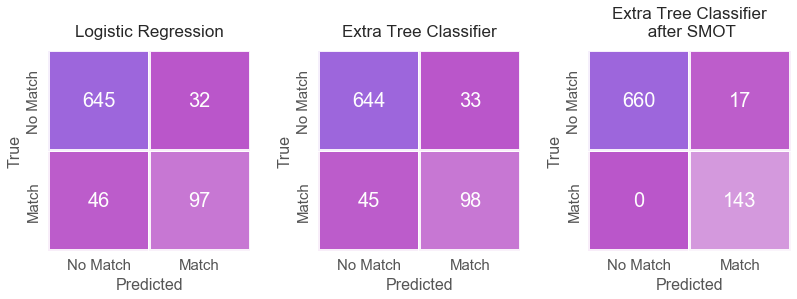

In [179]:
plt.style.use(['ggplot'])

fig, axes = plt.subplots(1,3, figsize=(11,3.5))
plt.tight_layout(h_pad=2)
plt.tight_layout(w_pad=4.0)

colors=['red']


#cmap = sns.diverging_palette(280, 300, as_cmap=True) 
cmap = sns.diverging_palette(300, 280, as_cmap=True)
g=sns.heatmap(confusion_lr2, annot=True, annot_kws={"size": 20},cmap=cmap,fmt='g', cbar=False,linewidths=2,ax=axes[0], alpha=.9)
# plt.xticks(rotation=0, fontsize=16)
# plt.yticks(fontsize=16)
axes[0].set_xticklabels(['No Match', 'Match'], fontsize=15)
axes[0].set_yticklabels(['Match', 'No Match'], fontsize=15)
axes[0].set_ylabel('True', fontsize=16)
axes[0].set_xlabel('Predicted', fontsize=16)
axes[0].set_title("Logistic Regression", fontsize=17, y=1.05)

g=sns.heatmap(confusion_et, annot=True, annot_kws={"size": 20},cmap=cmap,fmt='g', cbar=False,linewidths=2,ax=axes[1], alpha=.9)
axes[1].set_xticklabels(['No Match', 'Match'], fontsize=15)
axes[1].set_yticklabels(['Match', 'No Match'], fontsize=15)
axes[1].set_ylabel('True', fontsize=16)
axes[1].set_xlabel('Predicted', fontsize=16)
axes[1].set_title("Extra Tree Classifier", fontsize=17, y=1.05)
plt.subplots_adjust(top=0.9)

sns.heatmap(confusion_clf, annot=True, annot_kws={"size": 20},cmap=cmap,fmt='g',cbar=False,linewidths=2,ax=axes[2], alpha=.9)
axes[2].set_xticklabels(['No Match', 'Match'], fontsize=15)
axes[2].set_yticklabels(['Match', 'No Match'], fontsize=15)
axes[2].set_ylabel('True', fontsize=16)
axes[2].set_xlabel('Predicted', fontsize=16)
axes[2].set_title("Extra Tree Classifier\n after SMOT", fontsize=17, y=1.05)

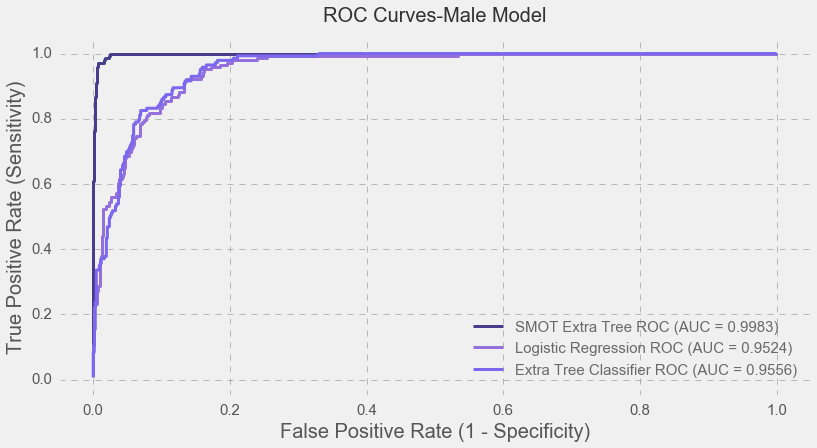

In [180]:


plt.style.use(['fivethirtyeight'])

plt.figure(figsize=(12,6))

y_pred_clf = clf.predict_proba(X_test)[:,1]
y_pred_lr = lr.predict_proba(X_test)[:,1]
y_pred_et = et.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_clf)
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test,y_pred_lr)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test,y_pred_et)

ROC_AUC = auc(fpr, tpr)
ROC_AUC1 = auc(fpr1, tpr1)
ROC_AUC2 = auc(fpr2, tpr2)




plt.plot(fpr, tpr, label='SMOT Extra Tree ROC (AUC = %0.4f)' % ROC_AUC,color='darkslateblue', linewidth=3)
plt.plot(fpr1, tpr1, label='Logistic Regression ROC (AUC = %0.4f)' % ROC_AUC1, color='mediumpurple',linewidth=3)
plt.plot(fpr2, tpr2, label='Extra Tree Classifier ROC (AUC = %0.4f)' % ROC_AUC2, color='mediumslateblue',linewidth=3)



plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=20)
plt.ylabel('True Positive Rate (Sensitivity)',fontsize=20)
plt.grid(color='gray', linestyle='--', alpha=.5)

l=plt.legend(loc='lower right', fontsize=15,bbox_to_anchor=(1, 0.015))
for text in l.get_texts():
    text.set_color("dimgray")

plt.title('ROC Curves-Male Model', color="black", alpha=0.8,fontsize=20, y=1.03)
plt.show()